In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
TRAIN_PATH = '/content/drive/MyDrive/Covid /DATASET/Train'
VAL_PATH = '/content/drive/MyDrive/Covid /DATASET/Val'
TEST_PATH = '/content/drive/MyDrive/Covid /DATASET/Test'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
)

valid_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Covid /DATASET/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Covid /DATASET/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Covid /DATASET/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1600 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

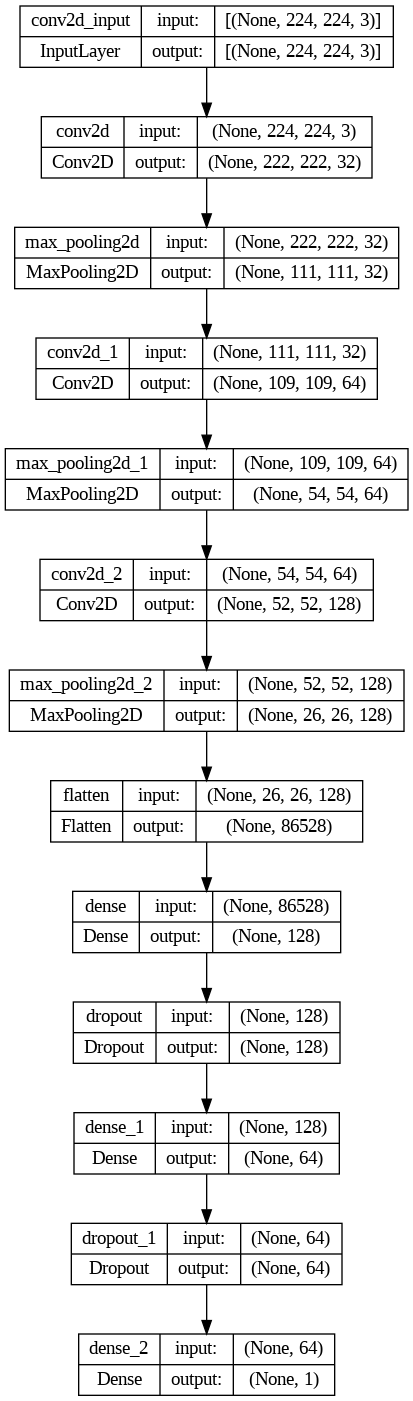

In [20]:
from keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)


In [7]:
history = model.fit(
    train_generator,
    batch_size =128,
    epochs=35,
    validation_data=valid_generator)

Epoch 1/35
50/50 [==============================] - 69s 1s/step - loss: 0.5902 - accuracy: 0.6925 - val_loss: 0.4314 - val_accuracy: 0.8176
Epoch 2/35
50/50 [==============================] - 60s 1s/step - loss: 0.4576 - accuracy: 0.8119 - val_loss: 0.4088 - val_accuracy: 0.8365
Epoch 3/35
50/50 [==============================] - 60s 1s/step - loss: 0.3697 - accuracy: 0.8681 - val_loss: 0.4343 - val_accuracy: 0.8176
Epoch 4/35
50/50 [==============================] - 66s 1s/step - loss: 0.3172 - accuracy: 0.8744 - val_loss: 0.4982 - val_accuracy: 0.8176
Epoch 5/35
50/50 [==============================] - 59s 1s/step - loss: 0.2679 - accuracy: 0.9013 - val_loss: 0.6832 - val_accuracy: 0.7925
Epoch 6/35
50/50 [==============================] - 60s 1s/step - loss: 0.2932 - accuracy: 0.8819 - val_loss: 0.3410 - val_accuracy: 0.8428
Epoch 7/35
50/50 [==============================] - 60s 1s/step - loss: 0.2167 - accuracy: 0.9175 - val_loss: 0.4483 - val_accuracy: 0.8239
Epoch 8/35
50/50 [==

In [8]:
# Use the trained model to make predictions
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

4/4 [==============================] - 4s 797ms/step


In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


4/4 [==============================] - 2s 530ms/step - loss: 0.0218 - accuracy: 0.9900
Test Loss: 0.0218
Test Accuracy: 0.9900


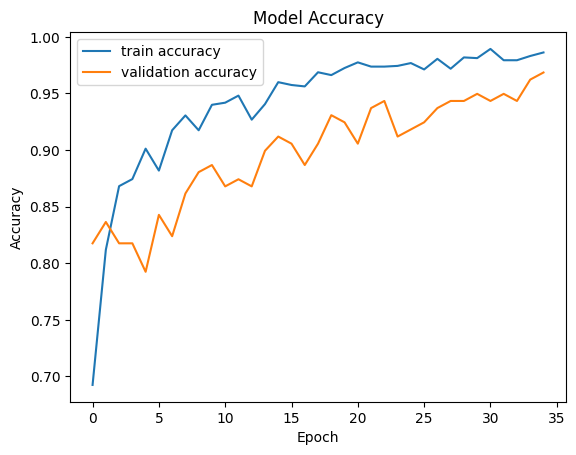

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

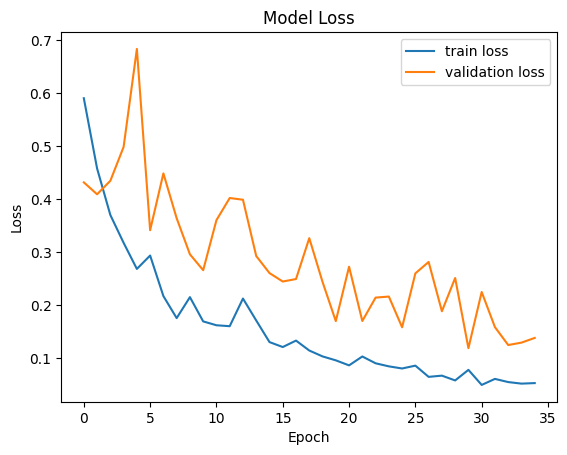

In [15]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()